---
title: "FWLÏóê Í∏∞Î∞òÌïú ÏûîÏ∞®Ìôî Î∞©Î≤ïÎ°† Íµ¨ÌòÑ ÎÖ∏Ìä∏Î∂Å"
date: 2025-07-10
category: "Causal Inference"
tags: ["residualization", "FWL"]
excerpt: "ÏûîÏ∞®ÌôîÎ•º ÌïòÍ∏∞ ÏúÑÌï¥ nusiance functionÏùÑ ÎßåÎì§Í≥† Í≤∞Í≥ºÎ•º Î∂ÑÏÑùÌïòÎäî ÎÖ∏Ìä∏Î∂Å"
---

# Load Data

In [ ]:
# from src.dataloader.vault.main import VaultDatasetLoader
# from src.dataloader.vault.utils import split_df_od_os
# from src.utils.db import SOFTCRM_DBINFO, get_conn

# import warnings
# import pandas as pd
# import numpy as np

# warnings.filterwarnings("ignore")

# # pandas display ÏòµÏÖò ÏÑ§Ï†ï - Î™®Îì† Ïó¥ Î≥¥Ïù¥Í∏∞
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)
# pd.set_option('display.max_colwidth', None)

# loader = VaultDatasetLoader()
# feature_df, y_df = loader.run(start_date="2022-01-01", end_date="2024-12-31", piol_data_path="./data/PIOLÎ†åÏ¶àÏ£ºÎ¨∏ÏÑú.xlsx", refresh=False, db="crm_emr")


# # y_dfÏùò oper_dateÏôÄ feature_dfÏùò dateÎ•º Í∏∞Ï§ÄÏúºÎ°ú Î≥ëÌï©
# merged_df = pd.merge(y_df, feature_df,
#                     left_on=['cust_num', 'oper_date'],
#                     right_on=['cust_num', 'date'],
#                     how='left')

# merged_df = split_df_od_os(merged_df)

# query = """SELECT CUST_NUM, BIRTH_DAY FROM VIEW_CUSTOM_JUMIN"""
# with get_conn(SOFTCRM_DBINFO) as conn, conn.cursor() as cursor:
#     cursor.execute(query)
#     result = cursor.fetchall()

# age_df = pd.DataFrame([list(res) for res in result], columns=["cust_num", "birthday"])
# age_df = age_df.applymap(lambda x: np.nan if isinstance(x, str) and x.strip() == "" else x)
# age_df["birthday"] = pd.to_datetime(age_df["birthday"], errors="coerce", format="%Y-%m-%d")
# age_df = age_df.dropna().reset_index(drop=True)
# age_df["cust_num"] = age_df["cust_num"].apply(lambda x: x.strip())
# cust_age_dict = dict(zip(age_df["cust_num"], age_df["birthday"]))

# merged_df['birthday'] = merged_df['cust_num'].map(cust_age_dict)
# merged_df['age'] = merged_df.apply(lambda row: pd.to_datetime(row['oper_date']).year - row['birthday'].year if pd.notnull(row['birthday']) else np.nan, axis=1)

In [ ]:
# merged_df.to_csv("./merged_df_2022_01_01_2024_12_31_with_age.csv", index=False)

# Modules

In [23]:
from src.preprocessing.constants import ALL_RANGES_NO_SIDE
import pandas as pd
import numpy as np


def load_data() -> tuple[pd.DataFrame, list, list, list]:
    """
    Îç∞Ïù¥ÌÑ∞Î•º Î°úÎìúÌïòÍ≥† Ï†ÑÏ≤òÎ¶¨ÌïòÏó¨ Î∂ÑÏÑùÏóê ÌïÑÏöîÌïú ÌòïÌÉúÎ°ú Î∞òÌôòÌï©ÎãàÎã§.

    Returns:
        tuple[pd.DataFrame, list, list, list]:
            - df_clean (pd.DataFrame): Ï†ÑÏ≤òÎ¶¨Îêú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ
            - features (list): ÌäπÏÑ± Î≥ÄÏàòÎ™Ö Î¶¨Ïä§Ìä∏ ["Cas_ata", "Cas_acd_endo", "Cas_clr", "age"]
            - treatment (list): Ï≤òÏπò Î≥ÄÏàòÎ™Ö Î¶¨Ïä§Ìä∏ ["size"]
            - y (list): Í≤∞Í≥º Î≥ÄÏàòÎ™Ö Î¶¨Ïä§Ìä∏ ["meas_vault"]

    Note:
        - NaN Í∞íÏù¥ ÏûàÎäî ÌñâÏùÄ Ï†úÍ±∞Îê©ÎãàÎã§
        - sizeÍ∞Ä [12.1, 12.6, 13.2]Í∞Ä ÏïÑÎãå Í≤ΩÏö∞Îäî Ï†úÍ±∞Îê©ÎãàÎã§
    """

    df = pd.read_csv("./data/merged_df_2022_01_01_2024_12_31_with_age.csv")

    df.head()
    features = ["Cas_ata", "Cas_acd_endo", "Cas_clr", "age"]
    treatment = ["size"]
    y = ["meas_vault"]

    # df Ï§ë features, treatment, y Ïª¨ÎüºÎßå ÎÇ®Í∏∞Í≥† ÏπºÎüº Ï†úÍ±∞, Ïù¥ ÏπºÎüºÎì§Ïóê ÎåÄÌïú Í∞íÏù¥ NaNÏù∏ Í≤ÉÎèÑ Ï†úÍ±∞
    selected_columns = features + treatment + y
    df_clean = df[selected_columns].copy()

    # df['size']Í∞Ä [12.1, 12.6, 13.2] Ïù¥ ÏïÑÎãå Í≤ΩÏö∞ Ï†úÍ±∞
    df_clean = df_clean[df_clean["size"].isin([12.1, 12.6, 13.2])].reset_index(drop=True)

    # Ïù¥ÏÉÅÏπò Ï†úÍ±∞ Î°úÏßÅ
    # Î™®Îì† Ïª¨ÎüºÏóê ÎåÄÌï¥ Î≤îÏúÑ Ï†ÅÏö©
    for column, range_obj in ALL_RANGES_NO_SIDE.items():
        if column in df_clean.columns:
            # Ïª¨Îüº Í∞íÏù¥ Î≤îÏúÑÎ•º Î≤óÏñ¥ÎÇòÎ©¥ np.nanÏúºÎ°ú Î≥ÄÍ≤Ω
            df_clean[column] = df_clean[column].where((df_clean[column] >= range_obj.min) & (df_clean[column] <= range_obj.max), np.nan)

    # Cas_cctÎ°ú vault Î≤îÏúÑ ÎßåÎì§Í≥†, ÎÑòÏñ¥Í∞ÄÎ©¥ ÏóÜÏï†Ï£ºÍ∏∞
    max_vault = ALL_RANGES_NO_SIDE["Cas_cct"].max * 1.5
    df_clean = df_clean[df_clean["meas_vault"] <= max_vault].reset_index(drop=True)

    # NaN Í∞íÏù¥ ÏûàÎäî Ìñâ Ï†úÍ±∞
    df_clean = df_clean.dropna()

    # ÎÇòÏù¥Í∞Ä 60Ïù¥ÏÉÅ Ï†úÍ±∞
    df_clean = df_clean[df_clean["age"] < 60].reset_index(drop=True)

    df_clean[y] = df_clean[y].abs()

    return df_clean, features, treatment, y

# ÏûîÏ∞®Ìôî ÏßÑÌñâÌïòÍ∏∞

> R-learnerÎäî FWL theoremÏóê Ïù¥Î°†Ï†Å Î∞∞Í≤ΩÏùÑ ÎëêÍ≥† ÏûàÏäµÎãàÎã§.   

**FWL Ï†ïÎ¶¨**Îäî Îã§Ï§ë ÌöåÍ∑ÄÎ∂ÑÏÑùÏóêÏÑú ÌäπÏ†ï Î≥ÄÏàòÏùò Í≥ÑÏàòÎ•º Íµ¨ÌïòÎäî Îëê Í∞ÄÏßÄ Î∞©Î≤ïÏù¥ ÎèôÏùºÌïú Í≤∞Í≥ºÎ•º Ï§ÄÎã§Îäî Í≤ÉÏùÑ Î≥¥Ïó¨Ï§çÎãàÎã§:

1. **ÏßÅÏ†ë ÌöåÍ∑Ä**: Î™®Îì† Î≥ÄÏàòÎ•º Ìè¨Ìï®Ìïú Ï†ÑÏ≤¥ ÌöåÍ∑ÄÎ™®Ìòï
2. **ÏûîÏ∞®Ìôî ÌõÑ ÌöåÍ∑Ä**: Í¥ÄÏã¨ Î≥ÄÏàòÏôÄ Ï¢ÖÏÜçÎ≥ÄÏàòÎ•º Îã§Î•∏ Î≥ÄÏàòÎì§Ïóê ÎåÄÌï¥ Í∞ÅÍ∞Å ÌöåÍ∑ÄÌïòÏó¨ ÏûîÏ∞®Î•º Íµ¨Ìïú ÌõÑ, Ïù¥ ÏûîÏ∞®Îì§ Í∞ÑÏùò ÌöåÍ∑Ä

ÏàòÌïôÏ†Å ÌëúÌòÑ:   

Î™®Ìòï: `Y = XŒ≤ + ZŒ≥ + Œµ`ÏóêÏÑú Œ≤Î•º Íµ¨ÌïòÍ≥† Ïã∂Îã§Î©¥:

1. **Î∞©Î≤ï 1**: Ï†ÑÏ≤¥ ÌöåÍ∑Ä
```
Œ≤ÃÇ = (X'M_Z X)^(-1) X'M_Z Y
```

2. **Î∞©Î≤ï 2**: ÏûîÏ∞®Ìôî
```
1. XÃÉ = M_Z X  (XÎ•º ZÏóê ÌöåÍ∑ÄÌïú ÏûîÏ∞®)
2. ·ª∏ = M_Z Y  (YÎ•º ZÏóê ÌöåÍ∑ÄÌïú ÏûîÏ∞®)  
3. Œ≤ÃÇ = (XÃÉ'XÃÉ)^(-1) XÃÉ'·ª∏
```

Ïó¨Í∏∞ÏÑú `M_Z = I - Z(Z'Z)^(-1)Z'`Îäî ZÏóê ÏàòÏßÅÏù∏ Ìà¨ÏòÅÌñâÎ†¨ÏûÖÎãàÎã§.

ÏûîÏ∞®ÌôîÍ∞Ä Í∞ÄÎä•Ìï¥ÏßÄÎäî Ïù¥Ïú†:   

1. **ÏßÅÍµêÏÑ±**: ÏûîÏ∞®ÌôîÎäî Îã§Î•∏ Î≥ÄÏàòÎì§Ïùò ÏòÅÌñ•ÏùÑ Ï†úÍ±∞ÌïòÏó¨ ÏàúÏàòÌïú Ìö®Í≥ºÎßå Î∂ÑÎ¶¨
2. **Ï∞®Ïõê Ï∂ïÏÜå**: Î≥µÏû°Ìïú Îã§Î≥ÄÎüâ Î¨∏Ï†úÎ•º Îã®ÏàúÌïú Ïù¥Î≥ÄÎüâ Î¨∏Ï†úÎ°ú Î≥ÄÌôò
3. **Ìï¥ÏÑù Ïö©Ïù¥ÏÑ±**: Îã§Î•∏ Î≥ÄÏàòÎì§ÏùÑ ÌÜµÏ†úÌïú ÌõÑÏùò ÏàúÏàòÌïú Í¥ÄÍ≥Ñ ÌååÏïÖ

> R-learnerÎäî Îã§ÏùåÍ≥º Í∞ôÏùÄ Îëê Îã®Í≥ÑÎ°ú Íµ¨ÌòÑÎê©ÎãàÎã§:

1. **Propensity Score**: TreatmentÎ•º FeaturesÎ°ú ÏòàÏ∏°
2. **Outcome Function**: OutcomeÏùÑ FeaturesÎ°ú ÏòàÏ∏°

**Step 1: Propensity Score (Treatment ÏûîÏ∞®Ìôî)**:
```python
# X ‚Üí T ÌöåÍ∑Ä (TreatmentÎ•º FeaturesÎ°ú ÏòàÏ∏°)
model = LogisticRegression()
model.fit(X_train, y_train)
propensity_scores = model.predict_proba(X_val)
```

**Step 2: Outcome Function (Y ÏûîÏ∞®Ìôî)**:
```python
# X ‚Üí Y ÌöåÍ∑Ä (OutcomeÏùÑ FeaturesÎ°ú ÏòàÏ∏°)
# Y_residual = Y - E[Y|X]
# T_residual = T - E[T|X] (propensity score ÌôúÏö©)
```

**Ïôú ÏûîÏ∞®ÌôîÍ∞Ä "Í∞ÄÎä•"Ìï¥ÏßÄÎäîÍ∞Ä?** :

- **A. Ï°∞Í±¥Î∂Ä ÎèÖÎ¶ΩÏÑ± ÌôïÎ≥¥**
```
E[T_residual | X] = 0
E[Y_residual | X] = 0
```
XÏùò ÏòÅÌñ•ÏùÑ Ï†úÍ±∞Ìï®ÏúºÎ°úÏç® ÏàúÏàòÌïú T‚ÜíY Ìö®Í≥ºÎßå Î∂ÑÎ¶¨

- **B. Ìé∏Ìñ• Ï†úÍ±∞ (Bias Elimination)**
    - **Selection bias**: Í¥ÄÏ∏°ÎêòÏßÄ ÏïäÏùÄ ÍµêÎûÄÎ≥ÄÏàòÏùò ÏòÅÌñ•
    - **Confounding**: XÍ∞Ä TÏôÄ Y Î™®ÎëêÏóê ÏòÅÌñ•ÏùÑ Ï£ºÎäî Î¨∏Ï†ú

- **C. Í≥ºÏ†ÅÌï© Î∞©ÏßÄ**

```python
# Cross-fitting ÏÇ¨Ïö©
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_SEED)
```
Out-of-sample ÏòàÏ∏°ÏúºÎ°ú Í≥ºÏ†ÅÌï© Î∞©ÏßÄ

**Ïã§Ï†ú Ïù∏Í≥ºÌö®Í≥º Ï∂îÏ†ï**

ÏµúÏ¢ÖÏ†ÅÏúºÎ°úÎäî Îã§ÏùåÍ≥º Í∞ôÏùÄ ÌöåÍ∑ÄÎ•º ÏàòÌñâ:
```
Y_residual = œÑ √ó T_residual + noise
```

Ïó¨Í∏∞ÏÑú `œÑ`Í∞Ä **ÏàúÏàòÌïú treatment effect**ÏûÖÎãàÎã§.

Í≤∞Î°†:   

FWL Ï†ïÎ¶¨ÏóêÏÑú ÏûîÏ∞®ÌôîÍ∞Ä Í∞ÄÎä•Ìï¥ÏßÄÎäî Ïù¥Ïú†Îäî:

1. **ÏàòÌïôÏ†Å**: ÏßÅÍµê Ìà¨ÏòÅÏùò ÏÑ±ÏßàÎ°ú Ïù∏Ìïú Í≥ÑÏàò Î∂àÎ≥ÄÏÑ±
2. **ÌÜµÍ≥ÑÏ†Å**: ÍµêÎûÄÎ≥ÄÏàò ÌÜµÏ†úÎ•º ÌÜµÌïú Ìé∏Ìñ• Ï†úÍ±∞  
3. **Ïã§Ïö©Ï†Å**: Î≥µÏû°Ìïú Îã§Î≥ÄÎüâ Î¨∏Ï†úÎ•º Îã®ÏàúÌïú Ïù¥Î≥ÄÎüâ Î¨∏Ï†úÎ°ú Î≥ÄÌôò


> R-learner Íµ¨ÌòÑÏùÄ Ïù¥ Ïù¥Î°†Ï†Å Í∏∞Î∞òÏùÑ **Ïù∏Í≥ºÏ∂îÎ°†**Ïóê Ïã§Ï†ú Ï†ÅÏö©Ìïú ÏÇ¨Î°ÄÎ°ú, ÌäπÌûà **Ïù¥ÏßàÏ†Å Ï≤òÏπòÌö®Í≥º(Heterogeneous Treatment Effects)** Ï∂îÏ†ïÏóê ÌôúÏö©ÎêòÍ≥† ÏûàÏäµÎãàÎã§.

# 1. propensity score function

> P(T|X)

XÏùº Îïå TÏùº ÌôïÎ•†ÏùÑ Íµ¨Ìï¥ÏÑú, Ïù¥Î•º ÌÜµÌï¥ ÏûîÏ∞®Ìôî ÏßÑÌñâ   
propensity scoreÎ•º ÌÜµÏ†úÌïòÎäî Í≤ÉÍ≥º TÎ•º ÌÜµÏ†úÌïòÎäî Í≤ÉÏùÄ Í∞ôÏùÄ ÏùòÎØ∏Ïù¥Í∏∞ ÎïåÎ¨∏Ïóê

In [24]:
df, features, treatment, y = load_data()
df[treatment] = df[treatment].astype("category")

(treatment,) = treatment
print(treatment)
df.head()

size


Cas_ata  Cas_acd_endo  Cas_clr  age  size  meas_vault
0    12.32          3.41    -18.0   33  12.6       574.0
1    12.27          3.40     33.0   33  12.6       548.0
2    11.77          3.09    120.0   29  12.1       274.0
3    11.98          3.40    -24.0   27  12.6       626.0
4    11.95          3.44   -137.0   27  12.6       653.0

Ï§ëÏöîÌïúÏ†ê! 
> Í≥ºÏ†ÅÌï©ÏùÑ ÌîºÌïòÍ∏∞ ÏúÑÌï¥ cross-fitting (ÎòêÎäî sample splitting)ÏùÑ ÏÇ¨Ïö©Ìï¥ÏÑú out-of-sample ÏòàÏ∏°Í∞íÏùÑ ÌôúÏö©

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import StandardScaler

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

# Ïπ¥ÌÖåÍ≥†Î¶¨Ìòï treatmentÎ•º Ïà´ÏûêÎ°ú Î≥ÄÌôò
X_features = df[features]
y_treatment_cat = df[treatment].cat.codes  # Ïπ¥ÌÖåÍ≥†Î¶¨Î•º Ïà´ÏûêÎ°ú Î≥ÄÌôò

print(f"Treatment Ïπ¥ÌÖåÍ≥†Î¶¨: {df[treatment].cat.categories}")
print(f"Treatment Î∂ÑÌè¨:\n{df[treatment].value_counts()}")
print(f"Ïà´Ïûê Î≥ÄÌôòÎêú Î∂ÑÌè¨:\n{pd.Series(y_treatment_cat).value_counts()}")

# Í∞Å ÌÅ¥ÎûòÏä§Î≥Ñ propensity score Ï†ÄÏû•Ïö© Î∞∞Ïó¥
class_categories = df[treatment].cat.categories
n_classes = len(class_categories)
propensity_scores_all = np.zeros((len(df), n_classes))

# StratifiedKFoldÎ°ú Ïπ¥ÌÖåÍ≥†Î¶¨ ÎπÑÏú® ÎßûÏ∂§
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_SEED)
fold_performances = []

for fold, (train_idx, val_idx) in enumerate(kf.split(X_features, y_treatment_cat)):
    print(f"\n=== Fold {fold + 1} ===")

    X_train, X_val = X_features.iloc[train_idx], X_features.iloc[val_idx]
    y_train, y_val = y_treatment_cat[train_idx], y_treatment_cat[val_idx]

    # Í∞Å foldÏùò treatment Î∂ÑÌè¨ ÌôïÏù∏
    print(f"Train Î∂ÑÌè¨: {pd.Series(y_train).value_counts().to_dict()}")
    print(f"Val Î∂ÑÌè¨: {pd.Series(y_val).value_counts().to_dict()}")

    # Îç∞Ïù¥ÌÑ∞ Ïä§ÏºÄÏùºÎßÅ (ÏàòÎ†¥ ÏÑ±Îä• Ìñ•ÏÉÅ)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)

    # Î™®Îç∏ ÌõàÎ†® (ÏàòÎ†¥ Î¨∏Ï†ú Ìï¥Í≤∞ÏùÑ ÏúÑÌïú ÏÑ§Ï†ï)
    model = LogisticRegression(
        random_state=42,
        max_iter=1000,  # Î∞òÎ≥µ ÌöüÏàò Ï¶ùÍ∞Ä (Í∏∞Î≥∏Í∞í: 100)
        solver="liblinear",  # Îã§Ï§ë ÌÅ¥ÎûòÏä§ Î∂ÑÎ•òÏóê Ï†ÅÌï©Ìïú ÏÜîÎ≤Ñ
    )
    model.fit(X_train_scaled, y_train)

    # ÌõàÎ†® ÏÑ±Îä• ÌôïÏù∏
    train_pred = model.predict(X_train_scaled)
    train_accuracy = accuracy_score(y_train, train_pred)

    # Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú Î™®Îì† ÌÅ¥ÎûòÏä§Î≥Ñ propensity score Í≥ÑÏÇ∞
    val_propensity = model.predict_proba(X_val_scaled)
    propensity_scores_all[val_idx] = val_propensity  # Î™®Îì† ÌÅ¥ÎûòÏä§ ÌôïÎ•† Ï†ÄÏû•

    # Í≤ÄÏ¶ù ÏÑ±Îä• ÌôïÏù∏
    val_pred = model.predict(X_val_scaled)
    val_accuracy = accuracy_score(y_val, val_pred)

    fold_performances.append(
        {"fold": fold + 1, "train_accuracy": train_accuracy, "val_accuracy": val_accuracy, "train_size": len(X_train), "val_size": len(X_val)}
    )

    print(f"ÌõàÎ†® Ï†ïÌôïÎèÑ: {train_accuracy:.3f}")
    print(f"Í≤ÄÏ¶ù Ï†ïÌôïÎèÑ: {val_accuracy:.3f}")

# ÏõêÎ≥∏ dfÏóê Í∞Å ÌÅ¥ÎûòÏä§Î≥Ñ propensity_score Ïª¨Îüº Ï∂îÍ∞Ä
for i, category in enumerate(class_categories):
    df[f"propensity_score_{category}"] = propensity_scores_all[:, i]

print(f"\n=== Ï†ÑÏ≤¥ Í≤∞Í≥º ===")
performance_df = pd.DataFrame(fold_performances)
print(f"ÌèâÍ∑† ÌõàÎ†® Ï†ïÌôïÎèÑ: {performance_df['train_accuracy'].mean():.3f} ¬± {performance_df['train_accuracy'].std():.3f}")
print(f"ÌèâÍ∑† Í≤ÄÏ¶ù Ï†ïÌôïÎèÑ: {performance_df['val_accuracy'].mean():.3f} ¬± {performance_df['val_accuracy'].std():.3f}")

print(f"\nÏ≤òÏùå 10Í∞ú ÏÉòÌîå:")
propensity_cols = [f"propensity_score_{cat}" for cat in class_categories]
print(df[["meas_vault", treatment] + propensity_cols].head(10))

print(f"\nÏÉùÏÑ±Îêú propensity score Ïª¨ÎüºÎì§:")
for col in propensity_cols:
    print(f"{col}: ÌèâÍ∑† {df[col].mean():.3f}")

Treatment Ïπ¥ÌÖåÍ≥†Î¶¨: Index([12.1, 12.6, 13.2], dtype='float64')
Treatment Î∂ÑÌè¨:
size
12.6    2768
12.1    1499
13.2     537
Name: count, dtype: int64
Ïà´Ïûê Î≥ÄÌôòÎêú Î∂ÑÌè¨:
1    2768
0    1499
2     537
Name: count, dtype: int64

=== Fold 1 ===
Train Î∂ÑÌè¨: {1: 2214, 0: 1199, 2: 430}
Val Î∂ÑÌè¨: {1: 554, 0: 300, 2: 107}
ÌõàÎ†® Ï†ïÌôïÎèÑ: 0.836
Í≤ÄÏ¶ù Ï†ïÌôïÎèÑ: 0.826

=== Fold 2 ===
Train Î∂ÑÌè¨: {1: 2214, 0: 1199, 2: 430}
Val Î∂ÑÌè¨: {1: 554, 0: 300, 2: 107}
ÌõàÎ†® Ï†ïÌôïÎèÑ: 0.832
Í≤ÄÏ¶ù Ï†ïÌôïÎèÑ: 0.836

=== Fold 3 ===
Train Î∂ÑÌè¨: {1: 2214, 0: 1200, 2: 429}
Val Î∂ÑÌè¨: {1: 554, 0: 299, 2: 108}
ÌõàÎ†® Ï†ïÌôïÎèÑ: 0.839
Í≤ÄÏ¶ù Ï†ïÌôïÎèÑ: 0.829

=== Fold 4 ===
Train Î∂ÑÌè¨: {1: 2215, 0: 1199, 2: 429}
Val Î∂ÑÌè¨: {1: 553, 0: 300, 2: 108}
ÌõàÎ†® Ï†ïÌôïÎèÑ: 0.833
Í≤ÄÏ¶ù Ï†ïÌôïÎèÑ: 0.831

=== Fold 5 ===
Train Î∂ÑÌè¨: {1: 2215, 0: 1199, 2: 430}
Val Î∂ÑÌè¨: {1: 553, 0: 300, 2: 107}
ÌõàÎ†® Ï†ïÌôïÎèÑ: 0.836
Í≤ÄÏ¶ù Ï†ïÌôïÎèÑ: 0.834

=== Ï†ÑÏ≤¥ Í≤∞Í≥º ===
ÌèâÍ∑† ÌõàÎ†® Ï†ïÌôïÎèÑ: 0.835 

In [27]:
df

Cas_ata  Cas_acd_endo  Cas_clr  age  size  meas_vault  \
0       12.32          3.41    -18.0   33  12.6       574.0   
1       12.27          3.40     33.0   33  12.6       548.0   
2       11.77          3.09    120.0   29  12.1       274.0   
3       11.98          3.40    -24.0   27  12.6       626.0   
4       11.95          3.44   -137.0   27  12.6       653.0   
...       ...           ...      ...  ...   ...         ...   
4799    11.55          3.28     73.0   35  12.1       496.0   
4800    11.69          3.44   -201.0   25  12.1       496.0   
4801    11.71          3.45   -140.0   25  12.1       391.0   
4802    11.69          3.30     -2.1   25  12.1       470.0   
4803    11.66          3.26    -60.0   25  12.1       535.0   

      propensity_score_12.1  propensity_score_12.6  propensity_score_13.2  
0                  0.001429               0.801852               0.196719  
1                  0.001866               0.856739               0.141395  
2                  0.408943               0.589929               0.001128  
3                  0.050293               0.931958               0.017749  
4                  0.065587               0.923483               0.010930  
...                     ...                    ...                    ...  
4799               0.653312               0.346598               0.000090  
4800               0.454940               0.544350               0.000709  
4801               0.390725               0.608116               0.001160  
4802               0.450012               0.549280               0.000708  
4803               0.544067               0.455540               0.000393  

[4804 rows x 9 columns]

# 2. Outcome function
>m(Y|X)

Ïù¥Î•º ÌÜµÌï¥ YÏóêÏÑú XÏùò ÏòÅÌñ•ÏùÑ Ï†úÍ±∞Ìïú ÏûîÏ∞®Î•º Íµ¨Ìï† Ïàò ÏûàÏùå. 

In [12]:
df, features, treatment, y = load_data()
df[treatment] = df[treatment].astype("category")

(treatment,) = treatment
print(treatment)
df.head()

size


Cas_ata  Cas_acd_endo  Cas_clr  age  size  meas_vault
0    12.32          3.41    -18.0   33  12.6       574.0
1    12.27          3.40     33.0   33  12.6       548.0
2    11.77          3.09    120.0   29  12.1       274.0
3    11.98          3.40    -24.0   27  12.6       626.0
4    11.95          3.44   -137.0   27  12.6       653.0

Ï§ëÏöîÌïúÏ†ê! 
> Í≥ºÏ†ÅÌï©ÏùÑ ÌîºÌïòÍ∏∞ ÏúÑÌï¥ cross-fitting (ÎòêÎäî sample splitting)ÏùÑ ÏÇ¨Ïö©Ìï¥ÏÑú out-of-sample ÏòàÏ∏°Í∞íÏùÑ ÌôúÏö©

=== Outcome Function ÌïôÏäµ (features ‚Üí y) ===
Features: ['Cas_ata', 'Cas_acd_endo', 'Cas_clr', 'age']
Target: meas_vault
Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: X=(4804, 4), y=(4804,)
Target ÌÜµÍ≥Ñ:
  ÌèâÍ∑†: 558.69
  ÌëúÏ§ÄÌé∏Ï∞®: 187.17
  Î≤îÏúÑ: [4.32, 1253.00]

=== Fold 1 ===
Train ÌÅ¨Í∏∞: 3843, Val ÌÅ¨Í∏∞: 961
Train target ÌèâÍ∑†: 559.75, Val target ÌèâÍ∑†: 554.44
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[25]	train's rmse: 154.049	eval's rmse: 161.433
ÌõàÎ†® RMSE: 154.049, Í≤ÄÏ¶ù RMSE: 161.433
ÌõàÎ†® R¬≤: 0.327, Í≤ÄÏ¶ù R¬≤: 0.233
ÌõàÎ†® MAE: 120.430, Í≤ÄÏ¶ù MAE: 127.047
ÏµúÏ†Å Î∞òÎ≥µÌöüÏàò: 25

=== Fold 2 ===
Train ÌÅ¨Í∏∞: 3843, Val ÌÅ¨Í∏∞: 961
Train target ÌèâÍ∑†: 557.40, Val target ÌèâÍ∑†: 563.84
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[32]	train's rmse: 152.139	eval's rmse: 162.221
ÌõàÎ†® RMSE: 152.139, Í≤ÄÏ¶ù RMSE: 162.221
ÌõàÎ†® R¬≤: 0.334, Í≤ÄÏ¶ù R¬≤: 0.270
ÌõàÎ†® MAE: 118.790, Í≤ÄÏ¶ù

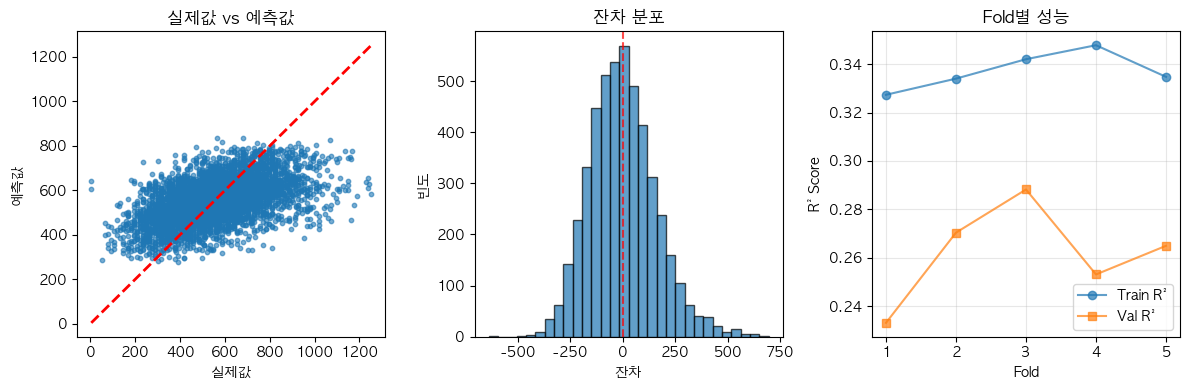


=== FoldÎ≥Ñ ÏÑ±Îä• ÏöîÏïΩ ===
   fold  train_rmse  val_rmse  train_r2  val_r2  best_iteration
0     1     154.049   161.433     0.327   0.233              25
1     2     152.139   162.221     0.334   0.270              32
2     3     151.893   157.425     0.342   0.288              41
3     4     150.525   164.268     0.348   0.253              40
4     5     153.179   158.170     0.335   0.265              31


In [16]:
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï (Îß• ÌôòÍ≤Ω)
import matplotlib.font_manager as fm

plt.rcParams["font.family"] = "AppleGothic"  # Îß•Ïö© ÌïúÍ∏Ä Ìè∞Ìä∏
plt.rcParams["axes.unicode_minus"] = False  # ÎßàÏù¥ÎÑàÏä§ Í∏∞Ìò∏ Íπ®Ïßê Î∞©ÏßÄ


RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

# 2. Outcome function (featuresÎ°ú y ÏòàÏ∏°)
print("=== Outcome Function ÌïôÏäµ (features ‚Üí y) ===")

X_features = df[features]
y_outcome = df[y[0]]  # yÎäî Î¶¨Ïä§Ìä∏Ïù¥ÎØÄÎ°ú Ï≤´ Î≤àÏß∏ ÏöîÏÜå Ï∂îÏ∂ú

print(f"Features: {features}")
print(f"Target: {y[0]}")
print(f"Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: X={X_features.shape}, y={y_outcome.shape}")
print(f"Target ÌÜµÍ≥Ñ:")
print(f"  ÌèâÍ∑†: {y_outcome.mean():.2f}")
print(f"  ÌëúÏ§ÄÌé∏Ï∞®: {y_outcome.std():.2f}")
print(f"  Î≤îÏúÑ: [{y_outcome.min():.2f}, {y_outcome.max():.2f}]")

# Out-of-sample ÏòàÏ∏°Í∞í Ï†ÄÏû•Ïö© Î∞∞Ïó¥
outcome_predictions = np.zeros(len(df))

# KFoldÎ°ú Î∂ÑÌï† (ÌöåÍ∑Ä Î¨∏Ï†úÏù¥ÎØÄÎ°ú StratifiedKFold ÎåÄÏã† KFold ÏÇ¨Ïö©)
kf = KFold(n_splits=5, shuffle=True, random_state=RANDOM_SEED)
fold_performances = []

# LightGBM ÌååÎùºÎØ∏ÌÑ∞ ÏÑ§Ï†ï (Í≥ºÏ†ÅÌï© Î∞©ÏßÄÏóê Ï§ëÏ†ê)
lgb_params = {
    "objective": "regression",
    "metric": "rmse",
    "boosting_type": "gbdt",
    "num_leaves": 15,  # ÏûëÍ≤å ÏÑ§Ï†ïÌïòÏó¨ Í≥ºÏ†ÅÌï© Î∞©ÏßÄ
    "learning_rate": 0.1,
    "feature_fraction": 0.8,
    "bagging_fraction": 0.8,
    "bagging_freq": 5,
    "lambda_l1": 0.1,  # L1 Ï†ïÍ∑úÌôî
    "lambda_l2": 0.1,  # L2 Ï†ïÍ∑úÌôî
    "min_data_in_leaf": 20,
    "min_split_gain": 0.1,
    "max_depth": 6,
    "verbose": -1,
    "random_state": RANDOM_SEED,
}

for fold, (train_idx, val_idx) in enumerate(kf.split(X_features, y_outcome)):
    print(f"\n=== Fold {fold + 1} ===")

    X_train, X_val = X_features.iloc[train_idx], X_features.iloc[val_idx]
    y_train, y_val = y_outcome.iloc[train_idx], y_outcome.iloc[val_idx]

    print(f"Train ÌÅ¨Í∏∞: {len(X_train)}, Val ÌÅ¨Í∏∞: {len(X_val)}")
    print(f"Train target ÌèâÍ∑†: {y_train.mean():.2f}, Val target ÌèâÍ∑†: {y_val.mean():.2f}")

    # LightGBM Îç∞Ïù¥ÌÑ∞ÏÖã ÏÉùÏÑ±
    train_data = lgb.Dataset(X_train, label=y_train)
    val_data = lgb.Dataset(X_val, label=y_val, reference=train_data)

    # Î™®Îç∏ ÌõàÎ†®
    model = lgb.train(
        lgb_params,
        train_data,
        valid_sets=[train_data, val_data],
        valid_names=["train", "eval"],
        num_boost_round=500,
        callbacks=[
            lgb.early_stopping(stopping_rounds=50),
            lgb.log_evaluation(period=0),  # Î°úÍ∑∏ Ï∂úÎ†• ÎπÑÌôúÏÑ±Ìôî
        ],
    )

    # ÏòàÏ∏°
    train_pred = model.predict(X_train, num_iteration=model.best_iteration)
    val_pred = model.predict(X_val, num_iteration=model.best_iteration)

    # Out-of-sample ÏòàÏ∏°Í∞í Ï†ÄÏû•
    outcome_predictions[val_idx] = val_pred

    # ÏÑ±Îä• Í≥ÑÏÇ∞
    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    val_rmse = np.sqrt(mean_squared_error(y_val, val_pred))
    train_r2 = r2_score(y_train, train_pred)
    val_r2 = r2_score(y_val, val_pred)
    train_mae = mean_absolute_error(y_train, train_pred)
    val_mae = mean_absolute_error(y_val, val_pred)

    fold_performances.append(
        {
            "fold": fold + 1,
            "train_rmse": train_rmse,
            "val_rmse": val_rmse,
            "train_r2": train_r2,
            "val_r2": val_r2,
            "train_mae": train_mae,
            "val_mae": val_mae,
            "best_iteration": model.best_iteration,
            "train_size": len(X_train),
            "val_size": len(X_val),
        }
    )

    print(f"ÌõàÎ†® RMSE: {train_rmse:.3f}, Í≤ÄÏ¶ù RMSE: {val_rmse:.3f}")
    print(f"ÌõàÎ†® R¬≤: {train_r2:.3f}, Í≤ÄÏ¶ù R¬≤: {val_r2:.3f}")
    print(f"ÌõàÎ†® MAE: {train_mae:.3f}, Í≤ÄÏ¶ù MAE: {val_mae:.3f}")
    print(f"ÏµúÏ†Å Î∞òÎ≥µÌöüÏàò: {model.best_iteration}")

# ÏõêÎ≥∏ dfÏóê outcome ÏòàÏ∏°Í∞í Ï∂îÍ∞Ä
df["outcome_prediction"] = outcome_predictions

print(f"\n=== Ï†ÑÏ≤¥ Outcome Function Í≤∞Í≥º ===")
performance_df = pd.DataFrame(fold_performances)

print(f"ÌèâÍ∑† ÌõàÎ†® RMSE: {performance_df['train_rmse'].mean():.3f} ¬± {performance_df['train_rmse'].std():.3f}")
print(f"ÌèâÍ∑† Í≤ÄÏ¶ù RMSE: {performance_df['val_rmse'].mean():.3f} ¬± {performance_df['val_rmse'].std():.3f}")
print(f"ÌèâÍ∑† ÌõàÎ†® R¬≤: {performance_df['train_r2'].mean():.3f} ¬± {performance_df['train_r2'].std():.3f}")
print(f"ÌèâÍ∑† Í≤ÄÏ¶ù R¬≤: {performance_df['val_r2'].mean():.3f} ¬± {performance_df['val_r2'].std():.3f}")
print(f"ÌèâÍ∑† ÌõàÎ†® MAE: {performance_df['train_mae'].mean():.3f} ¬± {performance_df['train_mae'].std():.3f}")
print(f"ÌèâÍ∑† Í≤ÄÏ¶ù MAE: {performance_df['val_mae'].mean():.3f} ¬± {performance_df['val_mae'].std():.3f}")

# Í≥ºÏ†ÅÌï© Ï≤¥ÌÅ¨
overfitting_score = performance_df["train_r2"].mean() - performance_df["val_r2"].mean()
print(f"\nÍ≥ºÏ†ÅÌï© ÏßÄÌëú (Train R¬≤ - Val R¬≤): {overfitting_score:.3f}")
if overfitting_score > 0.1:
    print("‚ö†Ô∏è  Ïã¨Í∞ÅÌïú Í≥ºÏ†ÅÌï©Ïù¥ Í∞êÏßÄÎêòÏóàÏäµÎãàÎã§. Ï†ïÍ∑úÌôîÎ•º Í∞ïÌôîÌïòÏÑ∏Ïöî.")
elif overfitting_score > 0.05:
    print("‚ö†Ô∏è  ÏïΩÍ∞ÑÏùò Í≥ºÏ†ÅÌï©Ïù¥ ÏûàÏäµÎãàÎã§.")
else:
    print("‚úÖ Í≥ºÏ†ÅÌï©Ïù¥ Ïûò Ï†úÏñ¥ÎêòÍ≥† ÏûàÏäµÎãàÎã§.")

print(f"\nÏ≤òÏùå 10Í∞ú ÏÉòÌîåÏùò Ïã§Ï†úÍ∞í vs ÏòàÏ∏°Í∞í:")
comparison_df = df[[y[0], "outcome_prediction"]].head(10)
comparison_df["residual"] = comparison_df[y[0]] - comparison_df["outcome_prediction"]
print(comparison_df)

print(f"\nOutcome ÏòàÏ∏°Í∞í ÌÜµÍ≥Ñ:")
print(f"  ÌèâÍ∑†: {df['outcome_prediction'].mean():.2f}")
print(f"  ÌëúÏ§ÄÌé∏Ï∞®: {df['outcome_prediction'].std():.2f}")
print(f"  Î≤îÏúÑ: [{df['outcome_prediction'].min():.2f}, {df['outcome_prediction'].max():.2f}]")

# ÏûîÏ∞® Í≥ÑÏÇ∞ (R-learnerÏùò Îã§Ïùå Îã®Í≥ÑÎ•º ÏúÑÌï¥)
df["outcome_residual"] = df[y[0]] - df["outcome_prediction"]
print(f"\nOutcome ÏûîÏ∞® ÌÜµÍ≥Ñ:")
print(f"  ÌèâÍ∑†: {df['outcome_residual'].mean():.2f} (0Ïóê Í∞ÄÍπåÏõåÏïº Ìï®)")
print(f"  ÌëúÏ§ÄÌé∏Ï∞®: {df['outcome_residual'].std():.2f}")

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 4))

# 1. Ïã§Ï†úÍ∞í vs ÏòàÏ∏°Í∞í
plt.subplot(1, 3, 1)
plt.scatter(df[y[0]], df["outcome_prediction"], alpha=0.6, s=10)
plt.plot([df[y[0]].min(), df[y[0]].max()], [df[y[0]].min(), df[y[0]].max()], "r--", lw=2)
plt.xlabel("Ïã§Ï†úÍ∞í")
plt.ylabel("ÏòàÏ∏°Í∞í")
plt.title("Ïã§Ï†úÍ∞í vs ÏòàÏ∏°Í∞í")

# 2. ÏûîÏ∞® Î∂ÑÌè¨
plt.subplot(1, 3, 2)
plt.hist(df["outcome_residual"], bins=30, alpha=0.7, edgecolor="black")
plt.xlabel("ÏûîÏ∞®")
plt.ylabel("ÎπàÎèÑ")
plt.title("ÏûîÏ∞® Î∂ÑÌè¨")
plt.axvline(0, color="red", linestyle="--", alpha=0.7)

# 3. FoldÎ≥Ñ ÏÑ±Îä•
plt.subplot(1, 3, 3)
plt.plot(performance_df["fold"], performance_df["train_r2"], "o-", label="Train R¬≤", alpha=0.7)
plt.plot(performance_df["fold"], performance_df["val_r2"], "s-", label="Val R¬≤", alpha=0.7)
plt.xlabel("Fold")
plt.ylabel("R¬≤ Score")
plt.title("FoldÎ≥Ñ ÏÑ±Îä•")
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ÏÑ±Îä• ÏöîÏïΩ ÌÖåÏù¥Î∏î
print(f"\n=== FoldÎ≥Ñ ÏÑ±Îä• ÏöîÏïΩ ===")
print(performance_df[["fold", "train_rmse", "val_rmse", "train_r2", "val_r2", "best_iteration"]].round(3))

In [22]:
df.iloc[[4799, 4800]]

Cas_ata  Cas_acd_endo  Cas_clr  age  size  meas_vault  \
4799    11.55          3.28     73.0   35  12.1       496.0   
4800    11.69          3.44   -201.0   25  12.1       496.0   

      outcome_prediction  outcome_residual  
4799          427.841553         68.158447  
4800          620.337738       -124.337738

/var/folders/ph/943dsflx24lbsx8rz54h45rw0000gn/T/ipykernel_74913/385186065.py:29: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(size_groups, labels=size_labels)


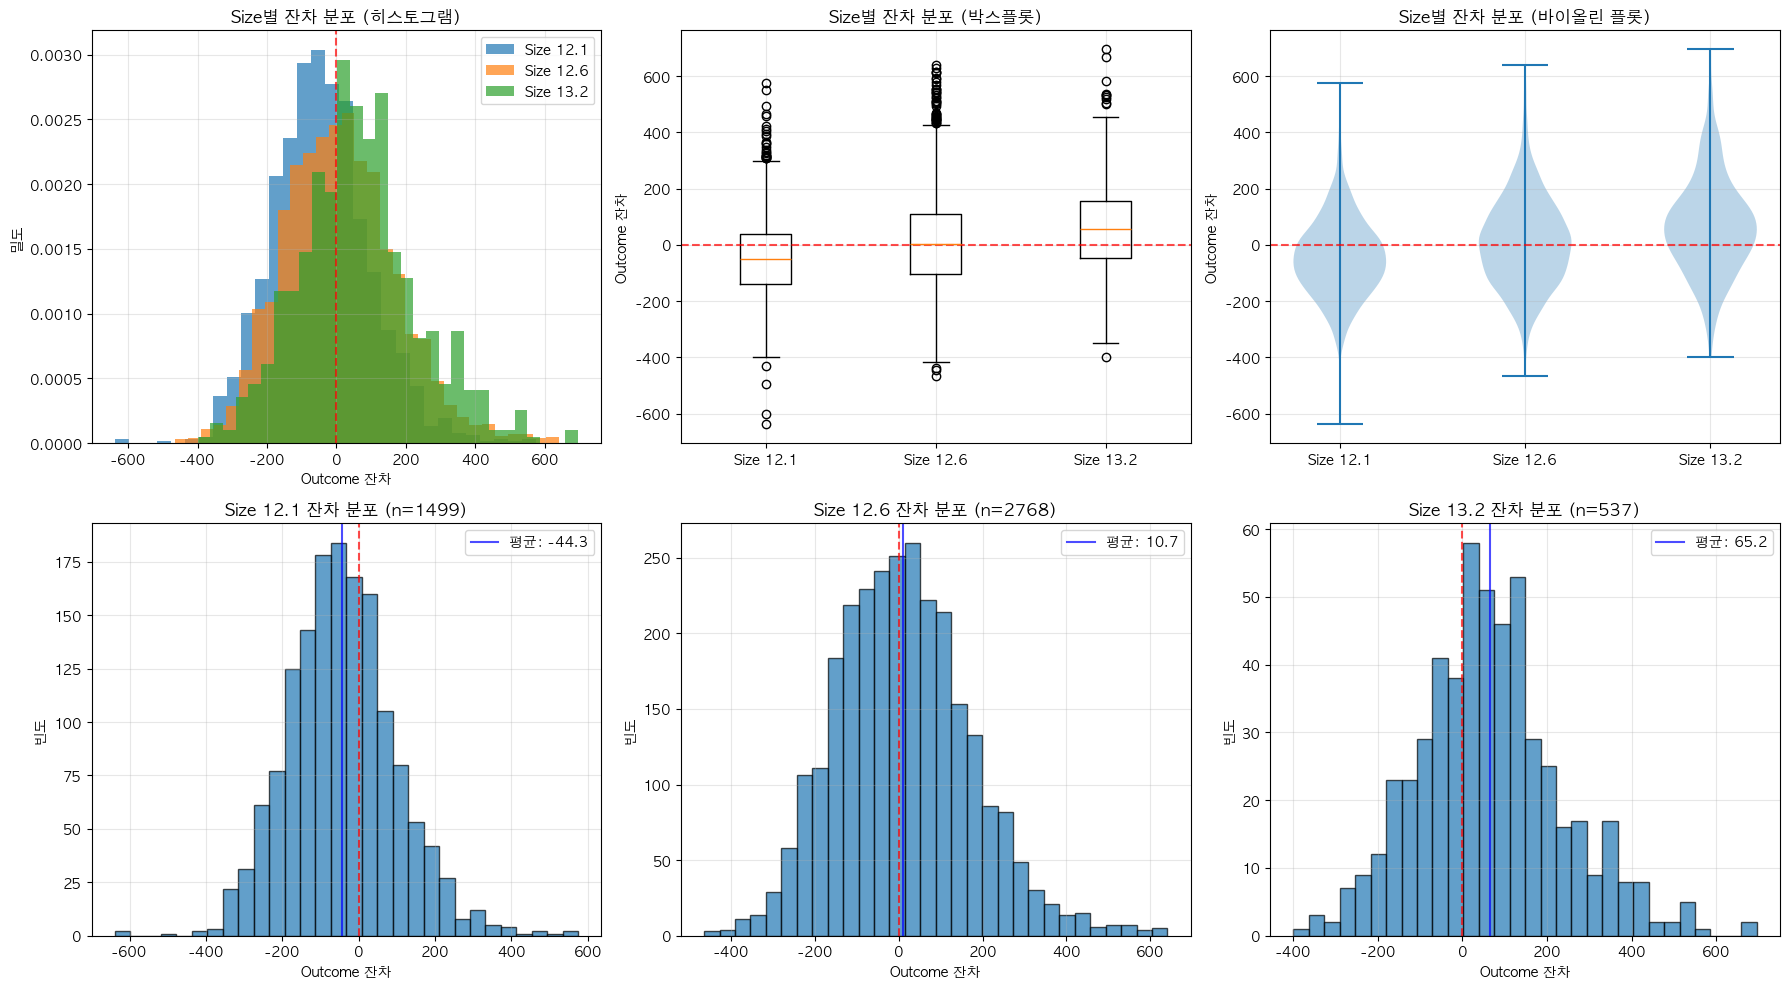

=== SizeÎ≥Ñ ÏûîÏ∞® ÌÜµÍ≥Ñ ===

Size 12.1 (n=1499):
  ÌèâÍ∑†:       -44.32
  ÌëúÏ§ÄÌé∏Ï∞®:   141.50
  Ï§ëÏïôÍ∞í:     -50.96
  Î≤îÏúÑ:     [-638.9,  574.6]

Size 12.6 (n=2768):
  ÌèâÍ∑†:        10.69
  ÌëúÏ§ÄÌé∏Ï∞®:   161.96
  Ï§ëÏïôÍ∞í:       3.74
  Î≤îÏúÑ:     [-464.8,  641.3]

Size 13.2 (n=537):
  ÌèâÍ∑†:        65.24
  ÌëúÏ§ÄÌé∏Ï∞®:   172.67
  Ï§ëÏïôÍ∞í:      58.07
  Î≤îÏúÑ:     [-399.6,  696.1]

Ï†ÑÏ≤¥ (n=4804):
  ÌèâÍ∑†:        -0.38
  ÌëúÏ§ÄÌé∏Ï∞®:   160.74

=== ANOVA Í≤ÄÏ†ï (sizeÎ≥Ñ ÏûîÏ∞® ÌèâÍ∑† Ï∞®Ïù¥) ===
F-ÌÜµÍ≥ÑÎüâ: 112.2751
p-value:  0.000000
‚ùå SizeÎ≥ÑÎ°ú ÏûîÏ∞® ÌèâÍ∑†Ïóê Ïú†ÏùòÌïú Ï∞®Ïù¥Í∞Ä ÏûàÏùå (Î¨∏Ï†ú)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rcParams["font.family"] = "AppleGothic"
plt.rcParams["axes.unicode_minus"] = False

# SizeÎ≥Ñ ÏûîÏ∞® Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# 1. SizeÎ≥Ñ ÌûàÏä§ÌÜ†Í∑∏Îû® (Í≤πÏπòÍ≤å)
plt.subplot(2, 3, 1)
for size in sorted(df["size"].unique()):
    residuals = df[df["size"] == size]["outcome_residual"]
    plt.hist(residuals, bins=30, alpha=0.7, label=f"Size {size}", density=True)

plt.axvline(0, color="red", linestyle="--", alpha=0.7)
plt.xlabel("Outcome ÏûîÏ∞®")
plt.ylabel("Î∞ÄÎèÑ")
plt.title("SizeÎ≥Ñ ÏûîÏ∞® Î∂ÑÌè¨ (ÌûàÏä§ÌÜ†Í∑∏Îû®)")
plt.legend()
plt.grid(True, alpha=0.3)

# 2. SizeÎ≥Ñ Î∞ïÏä§ÌîåÎ°Ø
plt.subplot(2, 3, 2)
size_groups = [df[df["size"] == size]["outcome_residual"] for size in sorted(df["size"].unique())]
size_labels = [f"Size {size}" for size in sorted(df["size"].unique())]

plt.boxplot(size_groups, labels=size_labels)
plt.axhline(0, color="red", linestyle="--", alpha=0.7)
plt.ylabel("Outcome ÏûîÏ∞®")
plt.title("SizeÎ≥Ñ ÏûîÏ∞® Î∂ÑÌè¨ (Î∞ïÏä§ÌîåÎ°Ø)")
plt.grid(True, alpha=0.3)

# 3. Î∞îÏù¥Ïò¨Î¶∞ ÌîåÎ°Ø
plt.subplot(2, 3, 3)
parts = plt.violinplot(size_groups, positions=range(1, len(size_groups) + 1))
plt.axhline(0, color="red", linestyle="--", alpha=0.7)
plt.xticks(range(1, len(size_labels) + 1), size_labels)
plt.ylabel("Outcome ÏûîÏ∞®")
plt.title("SizeÎ≥Ñ ÏûîÏ∞® Î∂ÑÌè¨ (Î∞îÏù¥Ïò¨Î¶∞ ÌîåÎ°Ø)")
plt.grid(True, alpha=0.3)

# 4-6. SizeÎ≥Ñ Í∞úÎ≥Ñ ÌûàÏä§ÌÜ†Í∑∏Îû®
for i, size in enumerate(sorted(df["size"].unique())):
    plt.subplot(2, 3, 4 + i)
    residuals = df[df["size"] == size]["outcome_residual"]

    plt.hist(residuals, bins=30, alpha=0.7, edgecolor="black")
    plt.axvline(0, color="red", linestyle="--", alpha=0.7)
    plt.axvline(residuals.mean(), color="blue", linestyle="-", alpha=0.7, label=f"ÌèâÍ∑†: {residuals.mean():.1f}")

    plt.xlabel("Outcome ÏûîÏ∞®")
    plt.ylabel("ÎπàÎèÑ")
    plt.title(f"Size {size} ÏûîÏ∞® Î∂ÑÌè¨ (n={len(residuals)})")
    plt.legend()
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# SizeÎ≥Ñ ÌÜµÍ≥Ñ ÏöîÏïΩ
print("=== SizeÎ≥Ñ ÏûîÏ∞® ÌÜµÍ≥Ñ ===")
for size in sorted(df["size"].unique()):
    residuals = df[df["size"] == size]["outcome_residual"]
    print(f"\nSize {size} (n={len(residuals)}):")
    print(f"  ÌèâÍ∑†:     {residuals.mean():8.2f}")
    print(f"  ÌëúÏ§ÄÌé∏Ï∞®: {residuals.std():8.2f}")
    print(f"  Ï§ëÏïôÍ∞í:   {residuals.median():8.2f}")
    print(f"  Î≤îÏúÑ:     [{residuals.min():6.1f}, {residuals.max():6.1f}]")

# Ï†ÑÏ≤¥ ÏûîÏ∞® ÌÜµÍ≥Ñ
print(f"\nÏ†ÑÏ≤¥ (n={len(df)}):")
print(f"  ÌèâÍ∑†:     {df['outcome_residual'].mean():8.2f}")
print(f"  ÌëúÏ§ÄÌé∏Ï∞®: {df['outcome_residual'].std():8.2f}")

# ANOVA Í≤ÄÏ†ï (sizeÎ≥Ñ ÏûîÏ∞® ÌèâÍ∑† Ï∞®Ïù¥ Í≤ÄÏ†ï)
from scipy.stats import f_oneway

size_12_1 = df[df["size"] == 12.1]["outcome_residual"]
size_12_6 = df[df["size"] == 12.6]["outcome_residual"]
size_13_2 = df[df["size"] == 13.2]["outcome_residual"]

f_stat, p_value = f_oneway(size_12_1, size_12_6, size_13_2)
print(f"\n=== ANOVA Í≤ÄÏ†ï (sizeÎ≥Ñ ÏûîÏ∞® ÌèâÍ∑† Ï∞®Ïù¥) ===")
print(f"F-ÌÜµÍ≥ÑÎüâ: {f_stat:.4f}")
print(f"p-value:  {p_value:.6f}")

if p_value < 0.05:
    print("‚ùå SizeÎ≥ÑÎ°ú ÏûîÏ∞® ÌèâÍ∑†Ïóê Ïú†ÏùòÌïú Ï∞®Ïù¥Í∞Ä ÏûàÏùå (Î¨∏Ï†ú)")
else:
    print("‚úÖ SizeÎ≥Ñ ÏûîÏ∞® ÌèâÍ∑†Ïóê Ïú†ÏùòÌïú Ï∞®Ïù¥ ÏóÜÏùå (Ï¢ãÏùå)")

> ÏûîÏ∞®ÌôîÍ∞Ä Ïûò ÎêêÎäîÏßÄÎäî Ïñ¥ÎñªÍ≤å ÌåêÎã®Ìï† Ïàò ÏûàÎäîÍ±∞ÏßÄ?   

Ï£ºÏöî ÌèâÍ∞Ä Í∏∞Ï§Ä:

1. Ï°∞Í±¥Î∂Ä ÎèÖÎ¶ΩÏÑ± (Í∞ÄÏû• Ï§ëÏöî)
- E[ÏûîÏ∞®|X] ‚âà 0
- R¬≤ < 0.01 Ïù¥Î©¥ Ïö∞Ïàò
- R¬≤ > 0.05 Ïù¥Î©¥ Î¨∏Ï†ú

2. Ìé∏Ìñ• Ï†úÍ±∞
- ÏûîÏ∞® ÌèâÍ∑† ‚âà 0
- Ï≤¥Í≥ÑÏ†ÅÏù∏ Í≥ºÎåÄ/Í≥ºÏÜåÏòàÏ∏° ÏóÜÏùå

3. Ï†ïÍ∑úÏÑ±
- ÏûîÏ∞®Í∞Ä Ï†ïÍ∑úÎ∂ÑÌè¨ ÌòïÌÉú
- ÏôúÎèÑ, Ï≤®ÎèÑÍ∞Ä 0Ïóê Í∞ÄÍπåÏõÄ

4. ÏûîÏ∞® Í∞Ñ ÎèÖÎ¶ΩÏÑ±
- Treatment ÏûîÏ∞®ÏôÄ Outcome ÏûîÏ∞® Í∞Ñ ÎÇÆÏùÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ
- ÏÉÅÍ¥ÄÍ≥ÑÏàò < 0.1 Ïù¥Î©¥ Ïù¥ÏÉÅÏ†Å

Ï°∞Í±¥Î∂Ä ÎèÖÎ¶ΩÏÑ± Í≤ÄÏÇ¨: E[outcome_residual | X] = 0

1. Ï†ÑÏ≤¥ Ï°∞Í±¥Î∂Ä ÎèÖÎ¶ΩÏÑ± Í≤ÄÏÇ¨
----------------------------------------
FeaturesÎ°ú ÏûîÏ∞® ÏòàÏ∏° R¬≤: 0.001075
‚úÖ Ïö∞Ïàò: Í∞ïÌïú Ï°∞Í±¥Î∂Ä ÎèÖÎ¶ΩÏÑ±

2. Í∞Å FeatureÎ≥Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ
----------------------------------------
Cas_ata        :   0.0142 ‚úÖ Îß§Ïö∞ ÎÇÆÏùå
Cas_acd_endo   :   0.0255 ‚úÖ Îß§Ïö∞ ÎÇÆÏùå
Cas_clr        :  -0.0251 ‚úÖ Îß§Ïö∞ ÎÇÆÏùå
age            :  -0.0187 ‚úÖ Îß§Ïö∞ ÎÇÆÏùå

3. ÏûîÏ∞® Í∏∞Î≥∏ ÌÜµÍ≥Ñ
----------------------------------------
ÌèâÍ∑†:      -0.3763 (0Ïóê Í∞ÄÍπåÏõåÏïº Ìï®)
ÌëúÏ§ÄÌé∏Ï∞®: 160.7405
ÏôúÎèÑ:       0.4576 (0Ïóê Í∞ÄÍπåÏõåÏïº Ìï®)
Ï≤®ÎèÑ:       0.6808 (0Ïóê Í∞ÄÍπåÏõåÏïº Ìï®)

4. ÌÜµÍ≥ÑÏ†Å Í≤ÄÏ†ï
----------------------------------------
F-Í≤ÄÏ†ï (Ï†ÑÏ≤¥ Î™®Îç∏ Ïú†ÏùòÏÑ±):
  F-ÌÜµÍ≥ÑÎüâ: 1.2907
  p-value:  0.271168
  ‚úÖ ÏûîÏ∞®ÏôÄ features Í∞Ñ Ïú†ÏùòÌïú Í¥ÄÍ≥Ñ ÏóÜÏùå (Ï¢ãÏùå)

Shapiro-Wilk Ï†ïÍ∑úÏÑ± Í≤ÄÏ†ï:
  ÌÜµÍ≥ÑÎüâ:   0.9879
  p-value:  0.000000
  ‚ö†Ô∏è  ÏûîÏ∞®Í∞Ä Ï†ïÍ∑úÎ∂ÑÌè¨Î•º

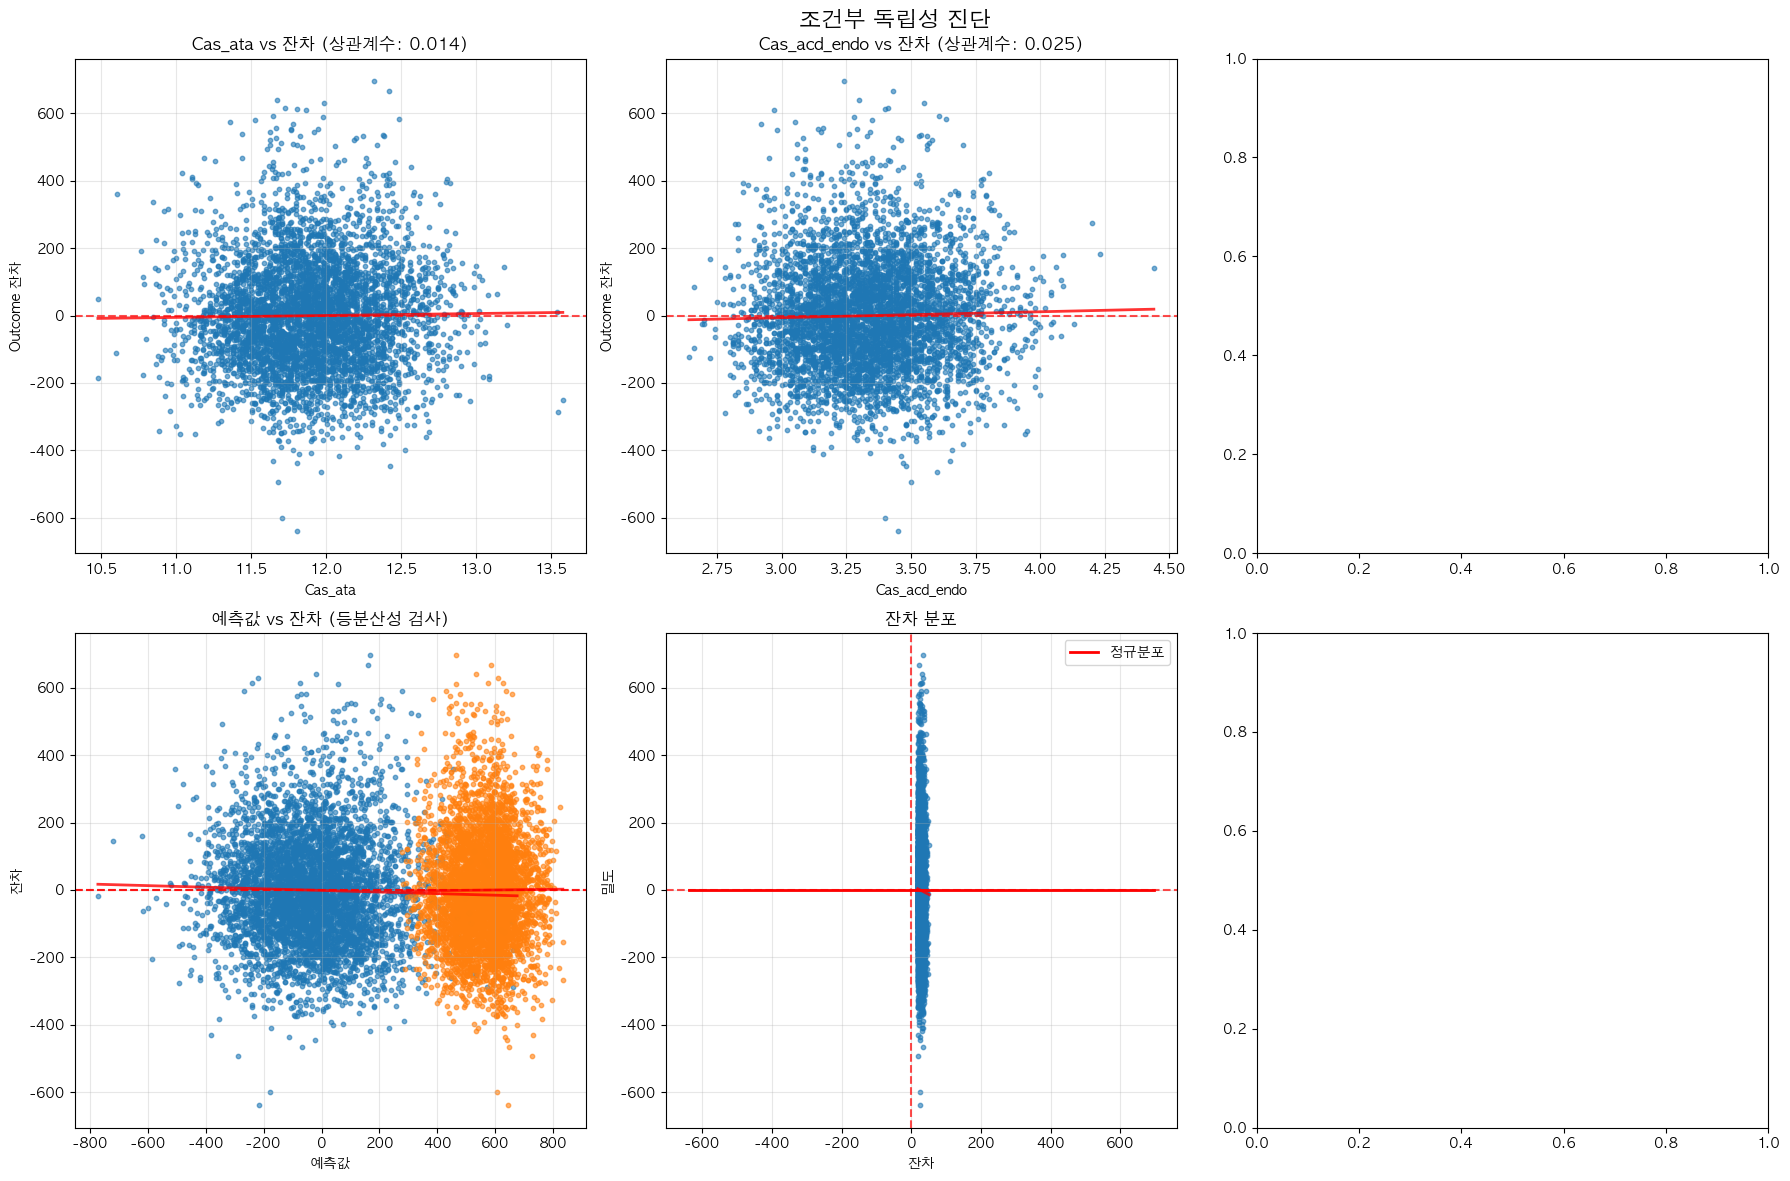

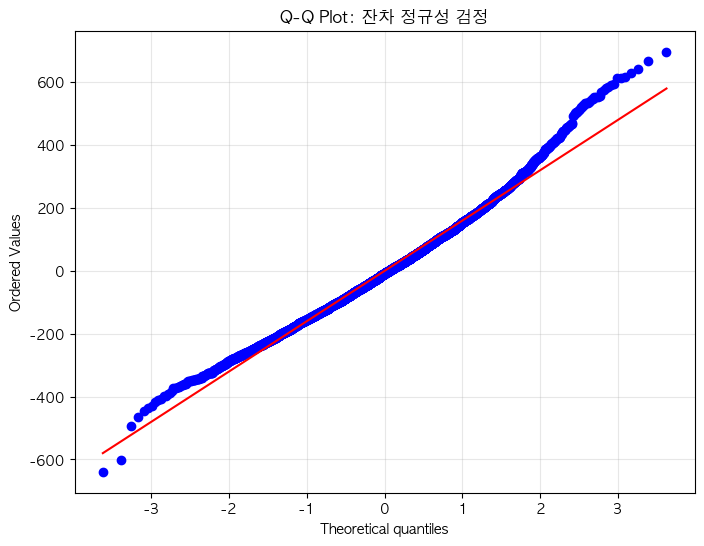


Ï¢ÖÌï© ÌèâÍ∞Ä
Ï°∞Í±¥Î∂Ä ÎèÖÎ¶ΩÏÑ± Îì±Í∏â: A
Ï†ÑÏ≤¥ R¬≤: 0.001075
Î∞úÍ≤¨Îêú Î¨∏Ï†ú: 1Í∞ú

Î¨∏Ï†úÏ†ê:
  ‚ùå Ìé∏Ìñ• Ï°¥Ïû¨

Í∞úÏÑ† Î∞©Ïïà:
  üîß Î™®Îç∏ Î≥µÏû°ÎèÑ Ï¶ùÍ∞Ä (Îçî ÎßéÏùÄ features, interaction terms)
  üîß ÎπÑÏÑ†Ìòï Î≥ÄÌôò Ï†ÅÏö©
  üîß Ï†ïÍ∑úÌôî ÌååÎùºÎØ∏ÌÑ∞ Ï°∞Ï†ï
  üîß Îã§Î•∏ ÏïåÍ≥†Î¶¨Ï¶ò ÏãúÎèÑ (XGBoost, Neural Network)


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy import stats

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rcParams["font.family"] = "AppleGothic"
plt.rcParams["axes.unicode_minus"] = False


def check_conditional_independence_comprehensive(df):
    """
    Outcome ÏûîÏ∞®Ïùò Ï°∞Í±¥Î∂Ä ÎèÖÎ¶ΩÏÑ±ÏùÑ Ï¢ÖÌï©Ï†ÅÏúºÎ°ú ÌôïÏù∏
    """

    features = ["Cas_ata", "Cas_acd_endo", "Cas_clr", "age"]
    residual_col = "outcome_residual"

    print("=" * 60)
    print("Ï°∞Í±¥Î∂Ä ÎèÖÎ¶ΩÏÑ± Í≤ÄÏÇ¨: E[outcome_residual | X] = 0")
    print("=" * 60)

    X = df[features]
    residuals = df[residual_col]

    # ===== 1. Ï†ÑÏ≤¥ R¬≤ ÌôïÏù∏ =====
    print("\n1. Ï†ÑÏ≤¥ Ï°∞Í±¥Î∂Ä ÎèÖÎ¶ΩÏÑ± Í≤ÄÏÇ¨")
    print("-" * 40)

    model = LinearRegression()
    model.fit(X, residuals)
    predictions = model.predict(X)
    r2_total = r2_score(residuals, predictions)

    print(f"FeaturesÎ°ú ÏûîÏ∞® ÏòàÏ∏° R¬≤: {r2_total:.6f}")

    # R¬≤ ÌèâÍ∞Ä
    if r2_total < 0.001:
        print("üéâ Ïö∞Ïàò: Îß§Ïö∞ Í∞ïÌïú Ï°∞Í±¥Î∂Ä ÎèÖÎ¶ΩÏÑ±")
        grade = "A+"
    elif r2_total < 0.01:
        print("‚úÖ Ïö∞Ïàò: Í∞ïÌïú Ï°∞Í±¥Î∂Ä ÎèÖÎ¶ΩÏÑ±")
        grade = "A"
    elif r2_total < 0.05:
        print("‚ö†Ô∏è  ÏñëÌò∏: ÏïΩÍ∞ÑÏùò ÏùòÏ°¥ÏÑ± Ï°¥Ïû¨")
        grade = "B"
    elif r2_total < 0.1:
        print("‚ö†Ô∏è  Î≥¥ÌÜµ: Ï§ëÍ∞Ñ Ï†ïÎèÑÏùò ÏùòÏ°¥ÏÑ±")
        grade = "C"
    else:
        print("‚ùå Î¨∏Ï†ú: Í∞ïÌïú ÏùòÏ°¥ÏÑ± - Î™®Îç∏ Í∞úÏÑ† ÌïÑÏöî")
        grade = "D"

    # ===== 2. Í∞Å featureÎ≥Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ =====
    print(f"\n2. Í∞Å FeatureÎ≥Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ")
    print("-" * 40)

    correlations = {}
    for feature in features:
        corr = np.corrcoef(df[feature], residuals)[0, 1]
        correlations[feature] = corr

        if abs(corr) < 0.05:
            status = "‚úÖ Îß§Ïö∞ ÎÇÆÏùå"
        elif abs(corr) < 0.1:
            status = "‚ö†Ô∏è  ÎÇÆÏùå"
        elif abs(corr) < 0.2:
            status = "‚ö†Ô∏è  Ï§ëÍ∞Ñ"
        else:
            status = "‚ùå ÎÜíÏùå"

        print(f"{feature:15}: {corr:8.4f} {status}")

    # ===== 3. ÏûîÏ∞®Ïùò Í∏∞Î≥∏ ÌÜµÍ≥Ñ =====
    print(f"\n3. ÏûîÏ∞® Í∏∞Î≥∏ ÌÜµÍ≥Ñ")
    print("-" * 40)

    mean_residual = residuals.mean()
    std_residual = residuals.std()
    skew_residual = stats.skew(residuals)
    kurt_residual = stats.kurtosis(residuals)

    print(f"ÌèâÍ∑†:     {mean_residual:8.4f} (0Ïóê Í∞ÄÍπåÏõåÏïº Ìï®)")
    print(f"ÌëúÏ§ÄÌé∏Ï∞®: {std_residual:8.4f}")
    print(f"ÏôúÎèÑ:     {skew_residual:8.4f} (0Ïóê Í∞ÄÍπåÏõåÏïº Ìï®)")
    print(f"Ï≤®ÎèÑ:     {kurt_residual:8.4f} (0Ïóê Í∞ÄÍπåÏõåÏïº Ìï®)")

    # ===== 4. ÌÜµÍ≥ÑÏ†Å Í≤ÄÏ†ï =====
    print(f"\n4. ÌÜµÍ≥ÑÏ†Å Í≤ÄÏ†ï")
    print("-" * 40)

    # F-test for overall significance
    n = len(residuals)
    k = len(features)
    f_stat = (r2_total / k) / ((1 - r2_total) / (n - k - 1))
    f_p_value = 1 - stats.f.cdf(f_stat, k, n - k - 1)

    print(f"F-Í≤ÄÏ†ï (Ï†ÑÏ≤¥ Î™®Îç∏ Ïú†ÏùòÏÑ±):")
    print(f"  F-ÌÜµÍ≥ÑÎüâ: {f_stat:.4f}")
    print(f"  p-value:  {f_p_value:.6f}")

    if f_p_value > 0.05:
        print("  ‚úÖ ÏûîÏ∞®ÏôÄ features Í∞Ñ Ïú†ÏùòÌïú Í¥ÄÍ≥Ñ ÏóÜÏùå (Ï¢ãÏùå)")
    else:
        print("  ‚ùå ÏûîÏ∞®ÏôÄ features Í∞Ñ Ïú†ÏùòÌïú Í¥ÄÍ≥Ñ Ï°¥Ïû¨ (Î¨∏Ï†ú)")

    # Shapiro-Wilk test for normality (ÏÉòÌîåÏù¥ ÎÑàÎ¨¥ ÌÅ¨Î©¥ ÏÉùÎûµ)
    if len(residuals) <= 5000:
        shapiro_stat, shapiro_p = stats.shapiro(residuals)
        print(f"\nShapiro-Wilk Ï†ïÍ∑úÏÑ± Í≤ÄÏ†ï:")
        print(f"  ÌÜµÍ≥ÑÎüâ:   {shapiro_stat:.4f}")
        print(f"  p-value:  {shapiro_p:.6f}")

        if shapiro_p > 0.05:
            print("  ‚úÖ ÏûîÏ∞®Í∞Ä Ï†ïÍ∑úÎ∂ÑÌè¨Î•º Îî∞Î¶Ñ")
        else:
            print("  ‚ö†Ô∏è  ÏûîÏ∞®Í∞Ä Ï†ïÍ∑úÎ∂ÑÌè¨Î•º Î≤óÏñ¥ÎÇ®")

    # ===== 5. ÏãúÍ∞ÅÌôî =====
    print(f"\n5. ÏãúÍ∞ÅÏ†Å ÏßÑÎã®")
    print("-" * 40)

    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle("Ï°∞Í±¥Î∂Ä ÎèÖÎ¶ΩÏÑ± ÏßÑÎã®", fontsize=16)

    # 5-1. Í∞Å feature vs ÏûîÏ∞®
    for i, feature in enumerate(features):
        row = i // 2
        col = i % 2

        axes[row, col].scatter(df[feature], residuals, alpha=0.6, s=10)
        axes[row, col].axhline(0, color="red", linestyle="--", alpha=0.7)

        # Ï∂îÏÑ∏ÏÑ†
        z = np.polyfit(df[feature], residuals, 1)
        p = np.poly1d(z)
        x_line = np.linspace(df[feature].min(), df[feature].max(), 100)
        axes[row, col].plot(x_line, p(x_line), "r-", alpha=0.8, linewidth=2)

        axes[row, col].set_xlabel(feature)
        axes[row, col].set_ylabel("Outcome ÏûîÏ∞®")
        axes[row, col].set_title(f"{feature} vs ÏûîÏ∞® (ÏÉÅÍ¥ÄÍ≥ÑÏàò: {correlations[feature]:.3f})")
        axes[row, col].grid(True, alpha=0.3)

    # 5-2. ÏòàÏ∏°Í∞í vs ÏûîÏ∞®
    axes[1, 0].scatter(df["outcome_prediction"], residuals, alpha=0.6, s=10)
    axes[1, 0].axhline(0, color="red", linestyle="--", alpha=0.7)

    z = np.polyfit(df["outcome_prediction"], residuals, 1)
    p = np.poly1d(z)
    x_line = np.linspace(df["outcome_prediction"].min(), df["outcome_prediction"].max(), 100)
    axes[1, 0].plot(x_line, p(x_line), "r-", alpha=0.8, linewidth=2)

    axes[1, 0].set_xlabel("ÏòàÏ∏°Í∞í")
    axes[1, 0].set_ylabel("ÏûîÏ∞®")
    axes[1, 0].set_title("ÏòàÏ∏°Í∞í vs ÏûîÏ∞® (Îì±Î∂ÑÏÇ∞ÏÑ± Í≤ÄÏÇ¨)")
    axes[1, 0].grid(True, alpha=0.3)

    # 5-3. ÏûîÏ∞® Î∂ÑÌè¨
    axes[1, 1].hist(residuals, bins=50, density=True, alpha=0.7, edgecolor="black")

    # Ï†ïÍ∑úÎ∂ÑÌè¨ Í≥°ÏÑ† Ïò§Î≤ÑÎ†àÏù¥
    mu, sigma = residuals.mean(), residuals.std()
    x_norm = np.linspace(residuals.min(), residuals.max(), 100)
    axes[1, 1].plot(x_norm, stats.norm.pdf(x_norm, mu, sigma), "r-", lw=2, label="Ï†ïÍ∑úÎ∂ÑÌè¨")
    axes[1, 1].axvline(0, color="red", linestyle="--", alpha=0.7)

    axes[1, 1].set_xlabel("ÏûîÏ∞®")
    axes[1, 1].set_ylabel("Î∞ÄÎèÑ")
    axes[1, 1].set_title("ÏûîÏ∞® Î∂ÑÌè¨")
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # ===== 6. Q-Q Plot =====
    plt.figure(figsize=(8, 6))
    stats.probplot(residuals, dist="norm", plot=plt)
    plt.title("Q-Q Plot: ÏûîÏ∞® Ï†ïÍ∑úÏÑ± Í≤ÄÏ†ï")
    plt.grid(True, alpha=0.3)
    plt.show()

    # ===== 7. Ï¢ÖÌï© ÌèâÍ∞Ä =====
    print(f"\n" + "=" * 60)
    print("Ï¢ÖÌï© ÌèâÍ∞Ä")
    print("=" * 60)

    issues = []

    if r2_total > 0.05:
        issues.append("Ï°∞Í±¥Î∂Ä ÎèÖÎ¶ΩÏÑ± ÏúÑÎ∞ò")

    if abs(mean_residual) > 0.1:
        issues.append("Ìé∏Ìñ• Ï°¥Ïû¨")

    if any(abs(corr) > 0.2 for corr in correlations.values()):
        issues.append("Í∞ïÌïú feature ÏùòÏ°¥ÏÑ±")

    if f_p_value < 0.05:
        issues.append("ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÌïú ÏùòÏ°¥ÏÑ±")

    print(f"Ï°∞Í±¥Î∂Ä ÎèÖÎ¶ΩÏÑ± Îì±Í∏â: {grade}")
    print(f"Ï†ÑÏ≤¥ R¬≤: {r2_total:.6f}")
    print(f"Î∞úÍ≤¨Îêú Î¨∏Ï†ú: {len(issues)}Í∞ú")

    if issues:
        print("\nÎ¨∏Ï†úÏ†ê:")
        for issue in issues:
            print(f"  ‚ùå {issue}")

        print(f"\nÍ∞úÏÑ† Î∞©Ïïà:")
        print(f"  üîß Î™®Îç∏ Î≥µÏû°ÎèÑ Ï¶ùÍ∞Ä (Îçî ÎßéÏùÄ features, interaction terms)")
        print(f"  üîß ÎπÑÏÑ†Ìòï Î≥ÄÌôò Ï†ÅÏö©")
        print(f"  üîß Ï†ïÍ∑úÌôî ÌååÎùºÎØ∏ÌÑ∞ Ï°∞Ï†ï")
        print(f"  üîß Îã§Î•∏ ÏïåÍ≥†Î¶¨Ï¶ò ÏãúÎèÑ (XGBoost, Neural Network)")
    else:
        print("\nüéâ Ï°∞Í±¥Î∂Ä ÎèÖÎ¶ΩÏÑ±Ïù¥ Ïûò ÎßåÏ°±Îê©ÎãàÎã§!")
        print("‚úÖ R-learnerÏùò Îã§Ïùå Îã®Í≥ÑÎ°ú ÏßÑÌñâ Í∞ÄÎä•")

    return {
        "r2_total": r2_total,
        "correlations": correlations,
        "mean_residual": mean_residual,
        "f_p_value": f_p_value,
        "grade": grade,
        "issues": issues,
    }


# Ïã§Ìñâ
results = check_conditional_independence_comprehensive(df)

# 3. CATE Ï∂îÏ†ï Î™®Îç∏
> CATE(X, T)

In [ ]:
class MultiTreatmentRLearner:
    def __init__(self, model_y, model_t, model_final):
        self.model_y = model_y  # Y Î™®Îç∏
        self.model_t = model_t  # Treatment propensity Î™®Îç∏
        self.model_final = model_final  # Final stage Î™®Îç∏

    def fit(self, Y, T, X, W=None):
        # Step 1: Estimate E[Y|X,W]
        if W is not None:
            XW = np.concatenate([X, W], axis=1)
        else:
            XW = X

        self.model_y.fit(XW, Y)
        Y_pred = self.model_y.predict(XW)
        Y_res = Y - Y_pred  # Y residuals

        # Step 2: Multi-treatment propensity estimation
        # One-hot encode treatments
        T_onehot = pd.get_dummies(T, drop_first=True)
        T_pred = np.zeros_like(T_onehot)

        for k, col in enumerate(T_onehot.columns):
            # Each treatment vs rest
            self.model_t.fit(XW, T_onehot[col])
            T_pred[:, k] = self.model_t.predict_proba(XW)[:, 1]

        T_res = T_onehot - T_pred  # Treatment residuals

        # Step 3: Final stage - regress Y_res on T_res * X
        # Create interaction terms
        features = []
        for k in range(T_res.shape[1]):
            # Œ∏_k(X) = X * Œ±_k (linear case)
            interaction = T_res[:, k : k + 1] * X
            features.append(interaction)

        final_features = np.concatenate(features, axis=1)
        self.model_final.fit(final_features, Y_res)

    def predict(self, X, T0, T1):
        # Predict treatment effects between T0 and T1
        # Œ∏(X) * (T1 - T0)
        pass

In [ ]:
from econml.dml import DML
from econml.metalearners import XLearner, TLearner

# EconMLÏùò meta-learnersÎäî multi-treatment ÏßÄÏõê
xl = XLearner(models=RandomForestRegressor())
xl.fit(Y, T, X=X)  # T can be multi-valued

In [ ]:
from causalml.inference.meta import XLearner
# Multi-treatment support